<a href="https://colab.research.google.com/github/EderLara/IA-Innovador-Talento-Tech/blob/main/Inteligencia_Artificial_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Guia para la creación, definición, entrenamiento y evaluación de una red neuronal simple para la clasificación de dígitos MNIST utilizando Keras y TensorFlow

In [2]:
import tensorflow as tf                         # La librería base de TensorFlow.
from tensorflow import keras                    # La API de alto nivel para construir y entrenar redes neuronales.
from tensorflow.keras import layers             # layers para definir las capas de la redneuronal
import matplotlib.pyplot as plt                 # La librería para gráficar

In [3]:
""" Cargar el Conjunto de Datos MNIST: """
# Keras proporciona funciones convenientes para cargar conjuntos de datos populares como MNIST.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()         # x_train y y_train son los datos de entrenamiento (imágenes y etiquetas respectivamente). x_test y y_test son los datos de prueba.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
""" Preprocesar los Datos: """
# Normalizar las imágenes para que los valores de los píxeles estén entre 0 y 1
x_train = x_train.astype("float32") / 255.0                       # Los valores de los píxeles en las imágenes MNIST están originalmente en el rango de 0 a 255.
x_test = x_test.astype("float32") / 255.0                         # Normalizarlos a un rango de 0 a 1 ayuda a que el entrenamiento de la red sea más estable y rápido.

# Aplanar las imágenes de 28x28 a un vector de 784 elementos
input_shape = (784,)                                              # Las imágenes MNIST son matrices de 28x28 píxeles. Para alimentar una red neuronal densa (fully connected),
x_train = x_train.reshape(x_train.shape[0], 784)                  # Necesitamos aplanar cada imagen en un vector unidimensional de 784 elementos (28 * 28).
x_test = x_test.reshape(x_test.shape[0], 784)

# Convertir las etiquetas a codificación one-hot
num_classes = 10                                                  # Las etiquetas (los dígitos del 0 al 9) se convierten a una representación "one-hot".
y_train = keras.utils.to_categorical(y_train, num_classes)        # Por ejemplo, el dígito '3' se convierte en el vector [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.].
y_test = keras.utils.to_categorical(y_test, num_classes)          # Esto es necesario para la capa de salida de clasificación con múltiples clases.

In [5]:
""" Definir la Arquitectura de la Red Neuronal: """
# Vamos a crear una red neuronal simple con una capa de entrada, una capa oculta y una capa de salida.
model = keras.Sequential(                                          # El modelo es una secuencia de capas. keras.Sequential: Define un modelo secuencial donde las capas se apilan linealmente.
    [
        layers.Input(shape=input_shape),                           # layers.Input(shape=input_shape): Define la capa de entrada, especificando la forma de los datos de entrada (un vector de 784 elementos).
        layers.Dense(128, activation="relu"),                      # Capa oculta con 128 neuronas y función de activación ReLU
        layers.Dense(num_classes, activation="softmax"),           # Capa de salida con 10 neuronas (una por clase) y función de activación softmax
    ]
)

# Notas:
# layers.Dense(128, activation="relu"): Define una capa densa (fully connected) con 128 neuronas. La función de activación ReLU (Rectified Linear Unit) es común en las capas ocultas.
# layers.Dense(num_classes, activation="softmax"): Define la capa de salida. Tiene num_classes (10) neuronas, una para cada dígito. La función de activación softmax convierte las salidas de la capa en una distribución de probabilidad sobre las 10 clases.


# Mostrar la arquitectura del modelo
model.summary()                     # model.summary(): Muestra un resumen de la arquitectura del modelo, incluyendo el número de capas, la forma de salida de cada capa y el número total de parámetros entrenables.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
""" Compilar y Entrenar el Modelo: """
# Antes de entrenar el modelo, necesitamos configurarlo especificando el optimizador, la función de pérdida y las métricas.

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Notas:
# loss="categorical_crossentropy": La función de pérdida utilizada para la clasificación multiclase con etiquetas codificadas en one-hot.
# optimizer="adam": Un algoritmo de optimización popular que ajusta los pesos de la red durante el entrenamiento para minimizar la función de pérdida.
# metrics=["accuracy"]: La métrica que se utilizará para evaluar el rendimiento del modelo durante el entrenamiento y la prueba. La precisión mide la fracción de las predicciones que son correctas.

In [7]:
""" Entrenar la Red """
# "Ahora, entrenaremos la red utilizando los datos de entrenamiento."

batch_size = 128                            # El número de muestras que se propagan a través de la red en cada paso del entrenamiento.
epochs = 10                                 # El número de veces que se itera sobre el conjunto de datos de entrenamiento.

# Entrenar el modelo
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# validation_split=0.1: Una fracción del conjunto de datos de entrenamiento (10% en este caso)
# se utilizará como un conjunto de validación para evaluar el rendimiento del modelo durante el entrenamiento y evitar el sobreajuste.
# model.fit(): Inicia el proceso de entrenamiento. La función devuelve un objeto history que contiene información sobre el entrenamiento, como la pérdida y la precisión en cada época

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8167 - loss: 0.6545 - val_accuracy: 0.9548 - val_loss: 0.1727
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9445 - loss: 0.1934 - val_accuracy: 0.9667 - val_loss: 0.1265
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9614 - loss: 0.1351 - val_accuracy: 0.9697 - val_loss: 0.1073
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9718 - loss: 0.0989 - val_accuracy: 0.9735 - val_loss: 0.0993
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9766 - loss: 0.0816 - val_accuracy: 0.9732 - val_loss: 0.0903
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9804 - loss: 0.0692 - val_accuracy: 0.9757 - val_loss: 0.0864
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9848 - loss: 0.0565 - val_accuracy: 0.9752 - val_loss: 0.0840
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9875 - loss: 0.0454 - val_accuracy: 0

In [8]:
""" Evaluar el Modelo: """
# Después del entrenamiento, evaluaremos el rendimiento del modelo en el conjunto de datos de prueba.

score = model.evaluate(x_test, y_test, verbose=0)                   # model.evaluate: Evalúa la pérdida y las métricas del modelo en el conjunto de datos de prueba. / verbose=0:Silencia la salida detallada.

# Imprimimos la perdida y precisión:
print("Pérdida en el conjunto de prueba:", score[0])
print("Precisión en el conjunto de prueba:", score[1])

Pérdida en el conjunto de prueba: 0.07460246235132217
Precisión en el conjunto de prueba: 0.9775999784469604


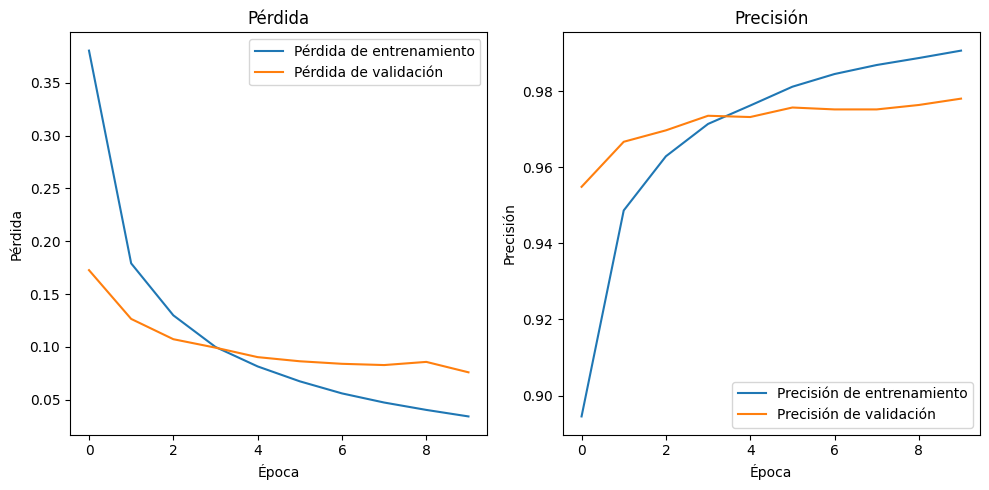

In [9]:
""" Visualizar el Entrenamiento (Opcional): """
# Podemos visualizar la pérdida y la precisión durante el entrenamiento para observar cómo aprende el modelo:

# Visualizar la pérdida del entrenamiento y la validación
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Visualizar la precisión del entrenamiento y la validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

# Verificar el Rendimiento y Funcionamiento

## Paso a Paso
1. Evalúa el modelo en el conjunto de prueba para obtener una métrica general de rendimiento (precisión).
2. Realiza predicciones en el conjunto de prueba para ver las salidas del modelo.
3. Visualiza las predicciones junto con las imágenes y las etiquetas verdaderas.
4. Inspecciona casos específicos de éxito y, especialmente, de fallo.
5. Utiliza métricas de clasificación detalladas como el informe de clasificación y la matriz de confusión para un análisis más profundo del rendimiento por clase.


In [10]:
""" Importar Librerías """
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [11]:
""" Realizar Predicciones: """
#  Esta función toma el conjunto de datos de prueba (solo las imágenes) y devuelve las predicciones del modelo.
predictions = model.predict(x_test)
# Para un problema de clasificación multiclase como MNIST, predictions será un array de probabilidades para cada clase (dígito) para cada imagen.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


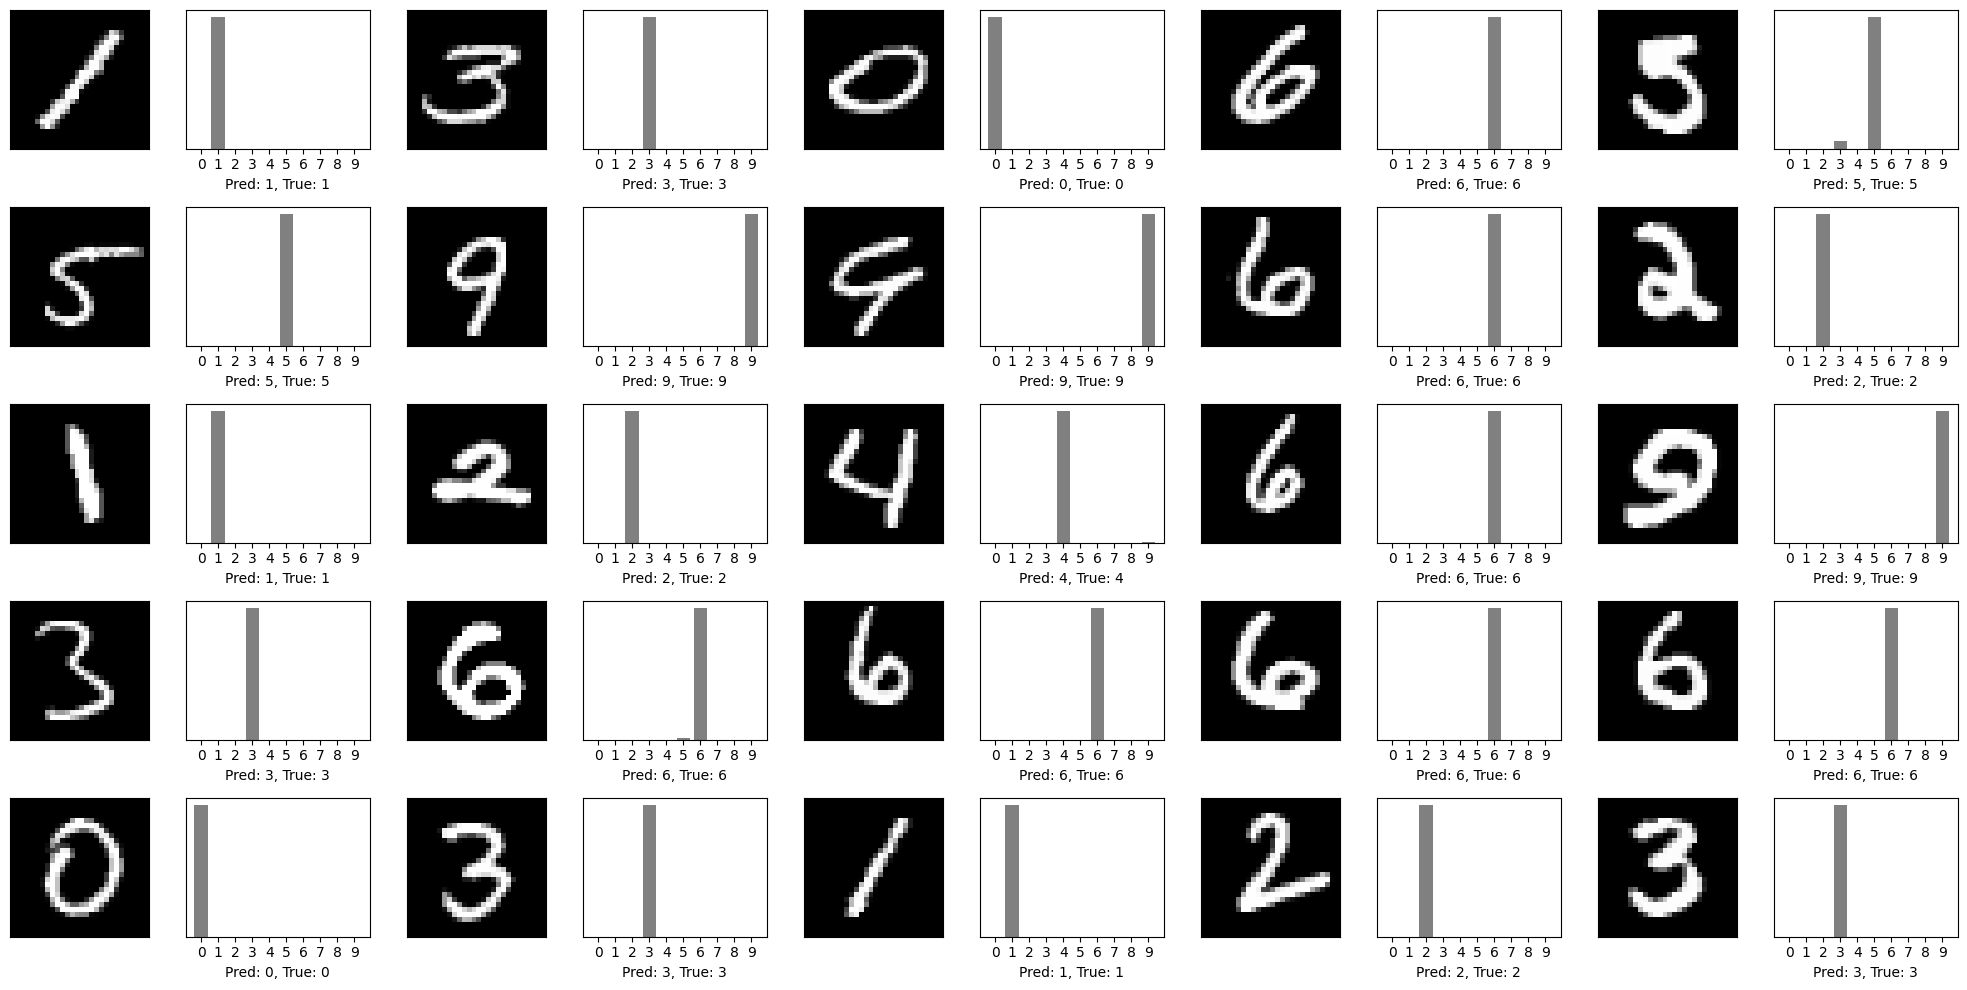

In [12]:
""" Visualizar las Predicciones """
# Tomamos un conjunto aleatorio de imágenes del conjunto de prueba

num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))                    # Muestra la imagen en la primera subgráfica
for i in range(num_images):
    index = np.random.randint(0, len(x_test))
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10), predictions[index], color='gray')                # Muestra un gráfico de barras de las probabilidades de cada clase predichas por el modelo en la segunda subgráfica.
    plt.xticks(range(10))
    predicted_label = np.argmax(predictions[index])
    true_label = np.argmax(y_test[index])
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}")          # Indica la etiqueta predicha (la clase con la mayor probabilidad) y la etiqueta verdadera.
    plt.yticks([])
plt.tight_layout()
plt.show()

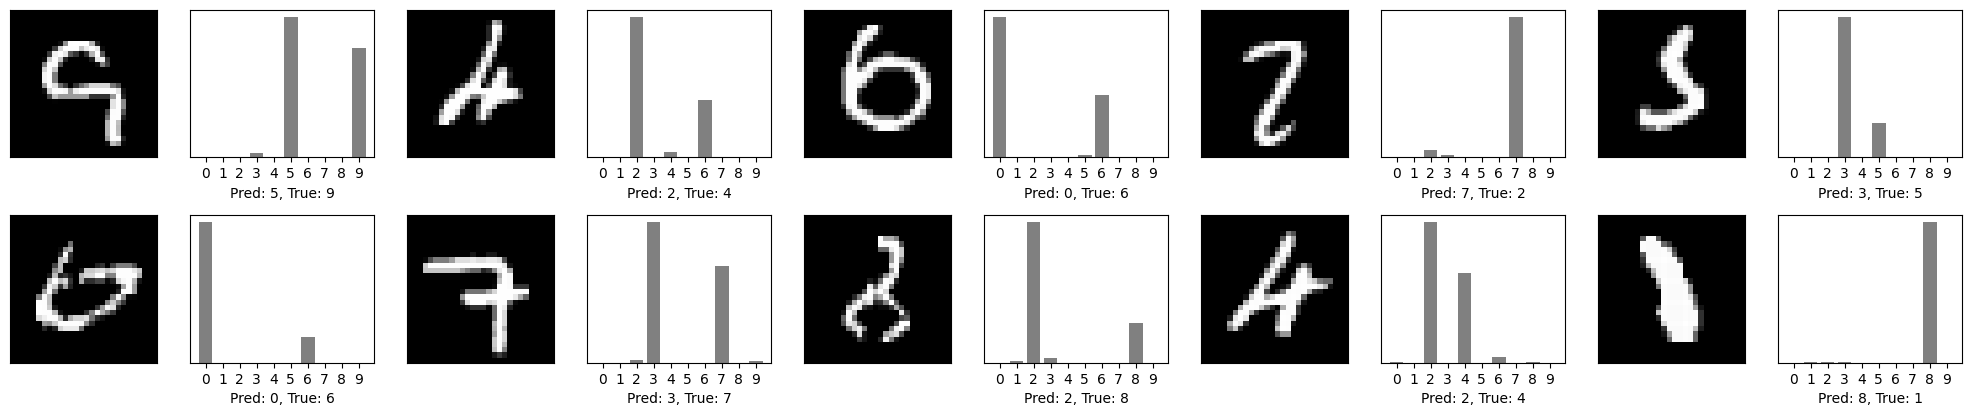

In [13]:
"""  Evaluar Casos Específicos (Ejemplos de Éxito y Fallo): """
# Encontrar algunos ejemplos donde la predicción fue incorrecta:

incorrect_index = np.where(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1))[0]

plt.figure(figsize=(2 * 2 * 5, 2 * 5))
for i, index in enumerate(incorrect_index[:10]):
    plt.subplot(5, 2 * 5, 2 * i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 2 * 5, 2 * i + 2)
    plt.bar(range(10), predictions[index], color='gray')
    plt.xticks(range(10))
    predicted_label = np.argmax(predictions[index])
    true_label = np.argmax(y_test[index])
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}")
    plt.yticks([])
plt.tight_layout()
plt.show()

# Notas:
# Este código encuentra los índices de las imágenes donde la predicción del modelo no coincide con la etiqueta verdadera.
# Luego, visualiza algunas de estas imágenes con sus predicciones y etiquetas verdaderas. Observar estos casos puede darte pistas sobre qué tipos de dígitos confunden al modelo.

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



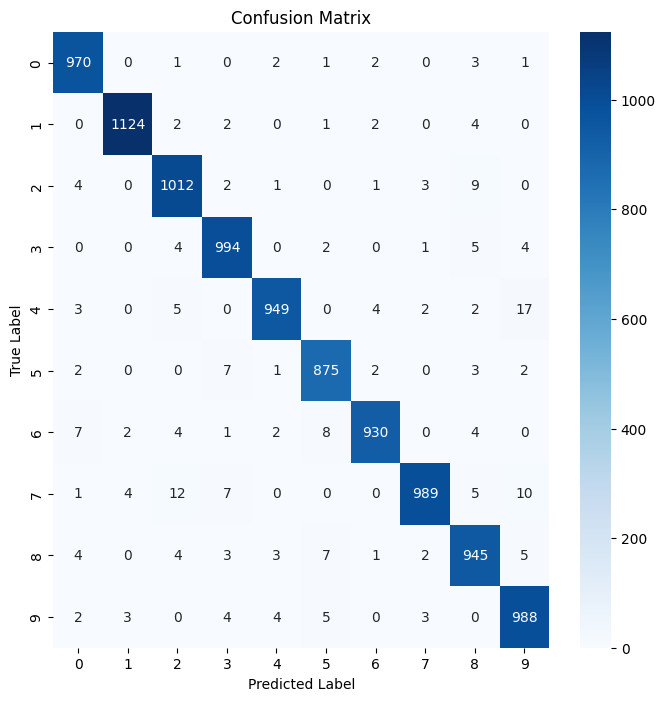

In [14]:
""" Usar Métricas de Clasificación Más Detalladas: """
# Además de la precisión general, puedes utilizar otras métricas de clasificación para obtener una visión más profunda del rendimiento del modelo por clase.

y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()